# Link Analysis

In [10]:
import networkx as nx
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Ecoli

3495


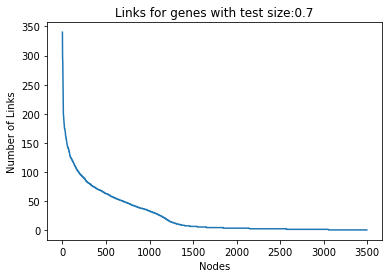

3585


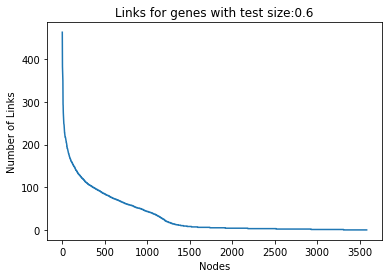

3634


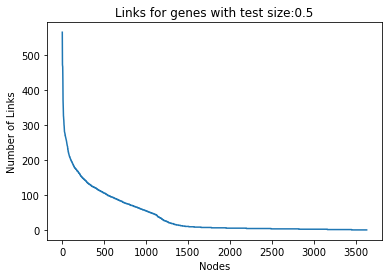

3662


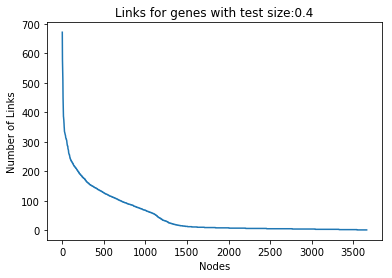

3677


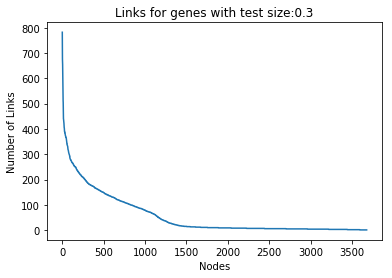

3685


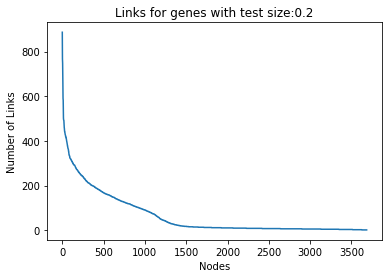

In [47]:
for test_size in [0.7, 0.6, 0.5, 0.4, 0.3, 0.2]:
    G=nx.read_edgelist("./data/ecoli/edgelist_train_"+str(test_size)+".txt", nodetype=int, data=(('weight',float),), delimiter=' ')
    y_sorted = sorted(G.degree(),key=itemgetter(1),reverse=True)
    print(len(y_sorted))
    plt.plot([x[1] for x in y_sorted])
    plt.xlabel("Nodes")
    plt.ylabel("Number of Links")
    plt.title("Links for genes with test size:" + str(test_size))
    plt.show()

# Yeast

5621


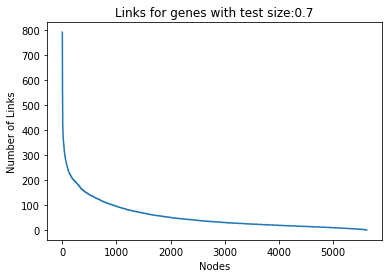

5629


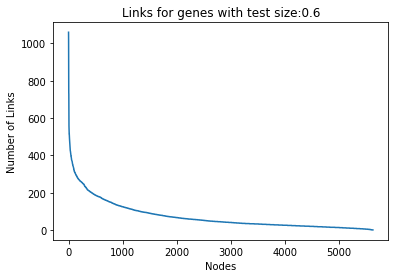

FileNotFoundError: [Errno 2] No such file or directory: './data/yeast/edgelist_train_0.5.txt'

In [48]:
for test_size in [0.7, 0.6, 0.5, 0.4, 0.3, 0.2]:
    G=nx.read_edgelist("./data/yeast/edgelist_train_"+str(test_size)+".txt", nodetype=int, data=(('weight',float),), delimiter=' ')
    y_sorted = sorted(G.degree(),key=itemgetter(1),reverse=True)
    print(len(y_sorted))
    plt.plot([x[1] for x in y_sorted])
    plt.xlabel("Nodes")
    plt.ylabel("Number of Links")
    plt.title("Links for genes with test size:" + str(test_size))
    plt.show()

In [3]:
import pandas as pd
import os
import numpy as np

In [1]:
import scipy.io as sio
from scipy.sparse import coo_matrix
def _load_network(filename, num_genes, mtrx='adj'):
    print ("### Loading [%s]..." % (filename))
    if mtrx == 'adj':
        i, j, val = np.loadtxt(filename).T
        A = coo_matrix((val, (i, j)), shape=(num_genes, num_genes))
        A = A.todense()
        A = np.squeeze(np.asarray(A))
    else:
        print ("### Wrong mtrx type. Possible: {'adj', 'inc'}")
    A = A - np.diag(np.diag(A))
    return A

In [4]:
gene_list = pd.read_csv("./data/ecoli/net3_gene_ids.tsv", sep="\t")

In [5]:
adj = _load_network("./data/ecoli/edgelist_biogrid.txt", len(gene_list))

### Loading [./data/ecoli/edgelist_biogrid.txt]...


In [13]:
y = sorted(np.sum(adj, axis=1))

In [8]:
x = [i for i in range(1, len(y) + 1)]

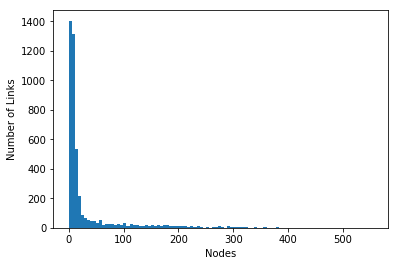

In [23]:
plt.hist(y, 100)
plt.xlabel("Nodes")
plt.ylabel("Number of Links")
plt.title("")
plt.show()

In [16]:
np.unique(y, return_counts=True)

(array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
           9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
          18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
          27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
          36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
          45.,   46.,   47.,   48.,   49.,   50.,   51.,   53.,   54.,
          55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
          64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
          73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
          82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
          91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,
         100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
         109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
         118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
      

In [19]:
G = nx.read_edgelist("./data/ecoli/data_ref/edgelist_train_0.txt", nodetype=int, data=(('weight', float),))

In [20]:
print(nx.is_connected(G))

True
